# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


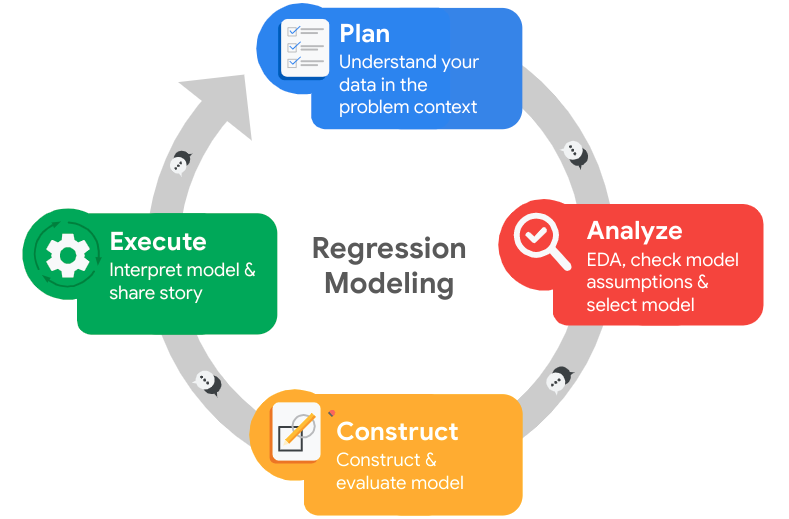

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




My principal stakeholder is Salifort’s senior leadership team.

The main problem is the high leaving employee rates, so we are going to predict if an employee will leave the company, and discover the reasons behind their departure.

My inicial observation are: There are two columns that we are going to need to encode, because department and salary seem to be very important for the leaving rate.

I don't have any ethical considerations yet.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [168]:
# Import packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [169]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [170]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [171]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [172]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [173]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [174]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [175]:
# Check for duplicates
df0.duplicated().sum()


3008

In [176]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [177]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

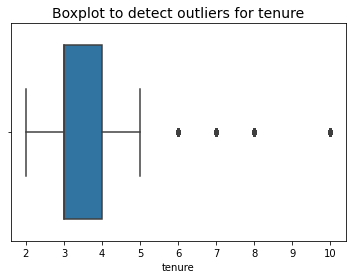

In [178]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(df1['tenure'])
plt.title('Boxplot to detect outliers for tenure',fontsize=14)
plt.show()


In [179]:
# Determine the number of rows containing outliers
# Determine 25% and 75% quantile
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('The numer of rows that contain outliers in tenure are',len(outliers))

# Delete outliers

df1 = df1[(df1['tenure'] <= upper_limit) & (df1['tenure'] >= lower_limit)]


The numer of rows that contain outliers in tenure are 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

The variable 'left' is not equally distributed. Only 18% of the employees left, but there is no need of upsampling.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [180]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
print()
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    9285
1    1882
Name: left, dtype: int64


0    0.831468
1    0.168532
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

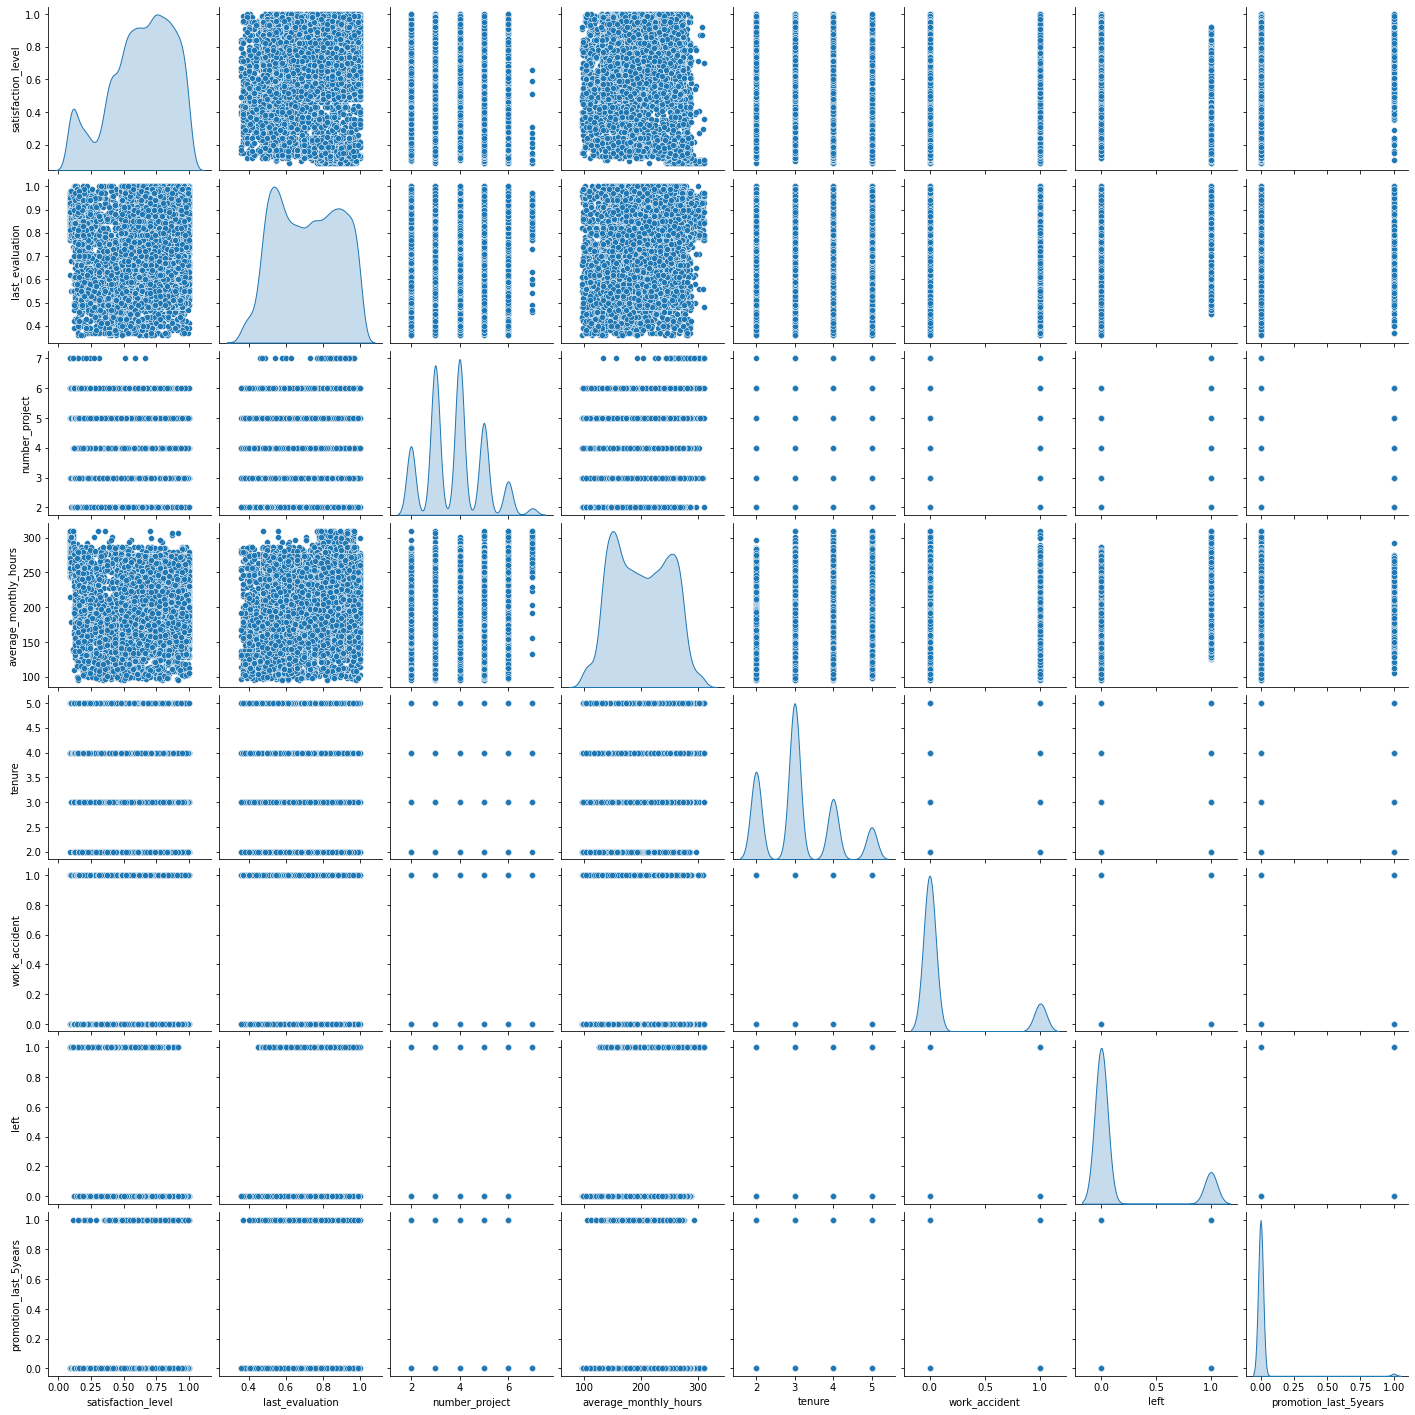

In [181]:
# Create a plot as needed
sns.pairplot(df1, diag_kind="kde")
plt.show()


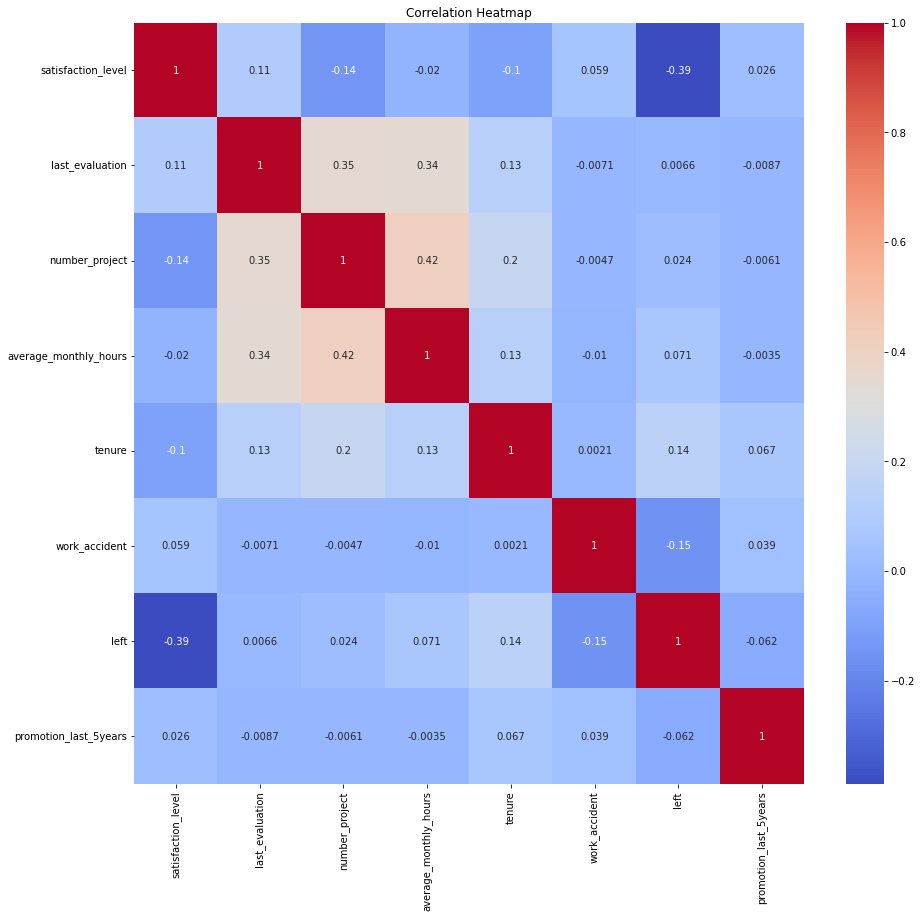

In [182]:
# As it seems, the pairplot plotted didn't give too much information, so lets plot a correlation heatmap
plt.figure(figsize=(15, 14))
sns.heatmap(df0.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

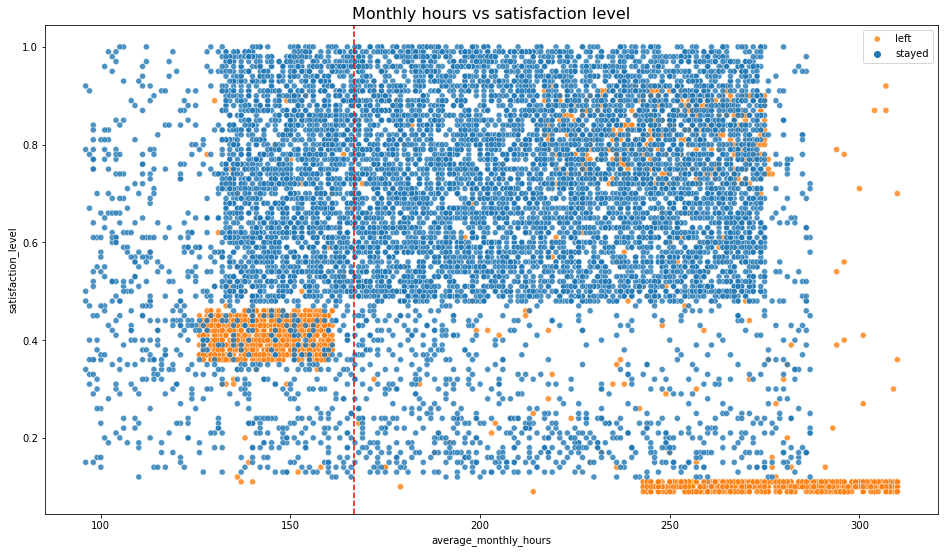

In [183]:
# Let's plot the monthly hours that employees spend working versus satisfaction level
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left',alpha=0.8)
plt.legend(labels=['left', 'stayed'])
plt.axvline(x=166.67, color='red',ls='--')
plt.title('Monthly hours vs satisfaction level', fontsize='16')
plt.show()

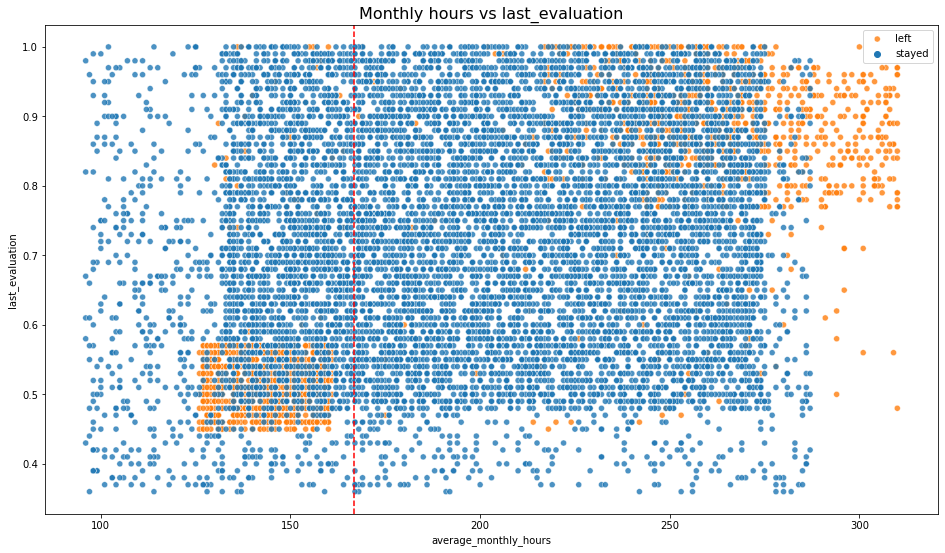

In [184]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left',alpha=0.8)
plt.legend(labels=['left', 'stayed'])
plt.axvline(x=166.67, color='red', ls='--')
plt.title('Monthly hours vs last_evaluation', fontsize='16')
plt.show()

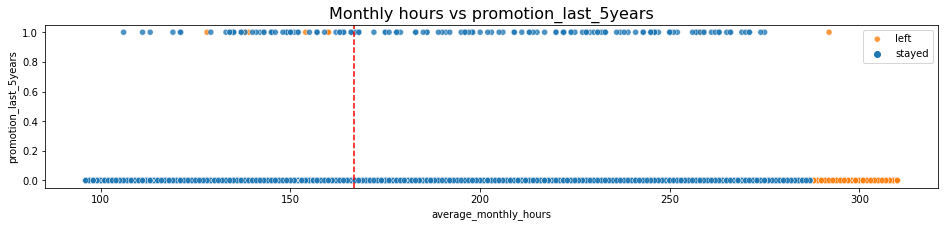

In [185]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left',alpha=0.8)
plt.legend(labels=['left', 'stayed'])
plt.axvline(x=166.67, color='red',ls='--')
plt.title('Monthly hours vs promotion_last_5years', fontsize='16')
plt.show()


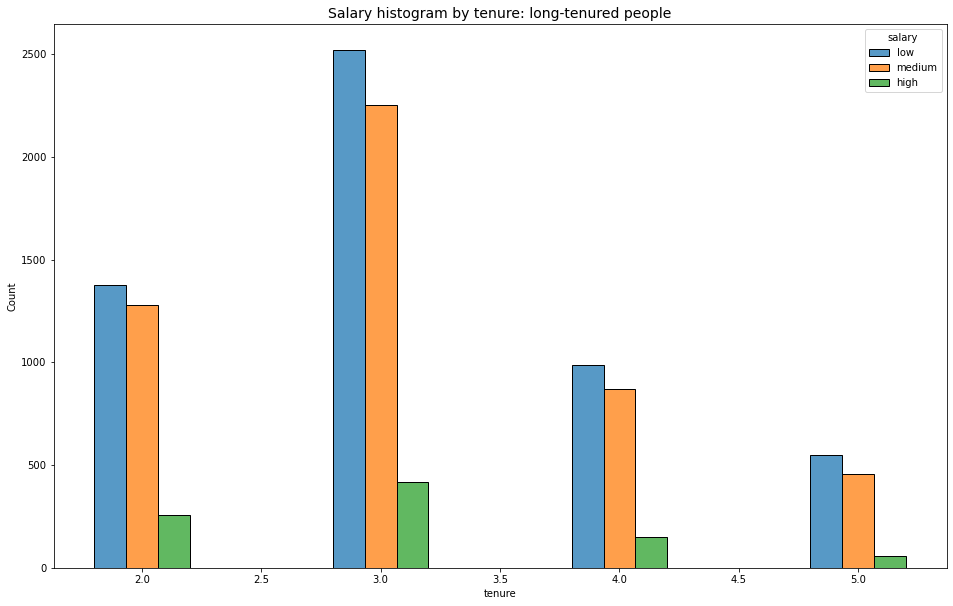

In [186]:
plt.figure(figsize=(16,10))
sns.histplot(data=df1, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4)
plt.title('Salary histogram by tenure: long-tenured people', fontsize='14');

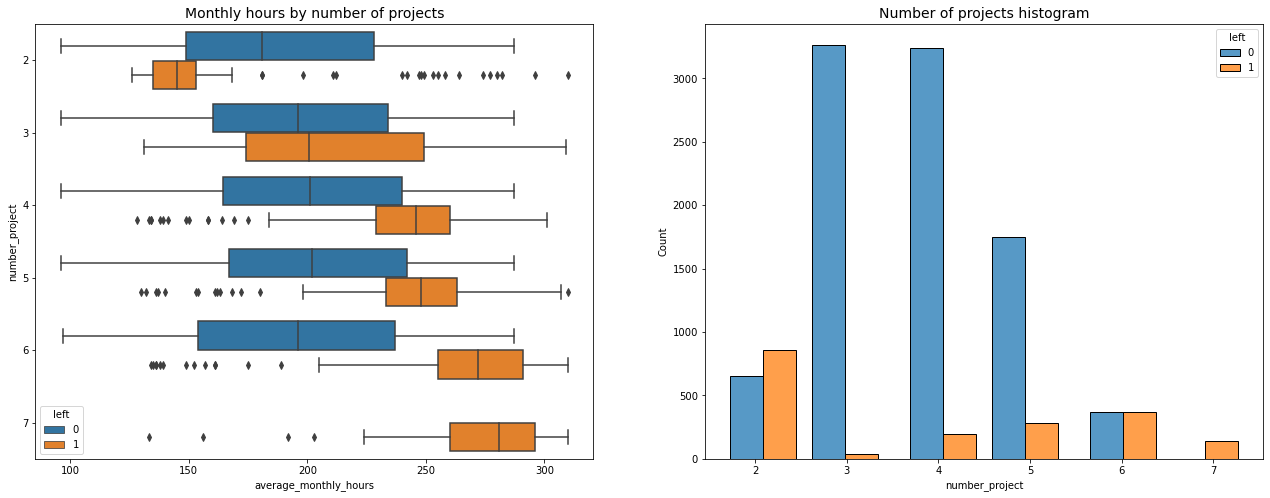

In [187]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=4, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plot
plt.show()

### Insights

In our analysis, we have observed a significant and inversely proportional correlation between the variable 'left' and the 'satisfaction level' within our dataset. This means that as the 'satisfaction level' of employees decreases, the likelihood of them leaving the organization ('left') increases. It's evident that employees who report lower satisfaction levels are more inclined to consider leaving their current positions, which is a crucial insight for employee retention efforts.

Furthermore, when examining the data, it's apparent that the variable 'number of projects' exhibits a strong positive correlation with the variable 'average monthly hours.' This correlation indicates that as the number of projects assigned to an employee increases, so do their average monthly working hours. This observation implies that employees tasked with more projects tend to put in longer hours to meet the demands of their workload. This insight can have implications for workload management and resource allocation strategies within the organization."

Additionally, employees with a high workload who have not received a promotion in the last 5 years are more likely to leave the company. Conversely, the few employees who have received a promotion in the last 5 years stayed.

It's worth noting that within our organization, there's a notable trend where employees who put in long hours at work are more likely to leave, regardless of their performance as reflected in the 'last evaluation' variable. This intriguing observation suggests that factors beyond individual job performance play a crucial role in employee retention.

While it might be assumed that employees with high 'last evaluation' scores would be less inclined to leave, the data shows that the number of working hours seems to have a more significant impact on their decision. In many cases, employees who work extended hours may experience burnout or dissatisfaction, leading them to consider leaving the company, even if their last performance evaluation suggests they are doing well in their roles.

This insight highlights the importance of considering various factors, including workload and employee well-being, when addressing retention strategies within the organization. Fostering a work environment that promotes a healthy work-life balance and supports employees in managing their workload may prove crucial in reducing turnover among high-performing individuals

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





# 💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd? No, everything seems normal.
- Which independent variables did you choose for the model and why? Every variable except 'left'
- Are each of the assumptions met? Yes.
- How well does your model fit the data? Depends on the model, we will discuss about each model precition later.
- Can you improve it? Is there anything you would change about the model? No.
- Do you have any ethical considerations in this stage? No.



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [188]:
df1.head(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low
10,0.45,0.54,2,135,3,0,1,0,sales,low


In [189]:
#encode categorical variables

df1['salary']=df1['salary'].map({'low':0,'medium':1,'high':2})

df1=pd.get_dummies(df1,drop_first=True)

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [190]:
y = df1['left']
X = df1.drop(['left'],axis=1)
print(y)
print()
X.info()

0        1
2        1
3        1
4        1
5        1
        ..
11985    0
11986    0
11987    0
11992    0
11999    0
Name: left, Length: 11167, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_monthly_hours   11167 non-null  int64  
 4   tenure                  11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   promotion_last_5years   11167 non-null  int64  
 7   salary                  11167 non-null  int64  
 8   department_RandD        11167 non-null  uint8  
 9   department_accounting   11167 non-null  uint8  
 10  department_hr           11167 non-null  uint8  
 11  department_management   11167 non-n

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((8375, 17), (2792, 17), (8375,), (2792,))

In [192]:
# Fit Logistic Regression model
log_model = LogisticRegression(random_state=42,max_iter=200000).fit(X_train,y_train)

In [193]:
log_y_pred = log_model.predict(X_test)
log_f1score = f1_score(y_test,log_y_pred)
log_precision= precision_score(y_test,log_y_pred)
log_accuracy = accuracy_score(y_test,log_y_pred)
log_recall = recall_score(y_test,log_y_pred)
log_roc = roc_auc_score(y_test,log_y_pred)


In [194]:
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1', 'Accuracy', 'Auc'])
results_df = results_df.append({'Model': 'Logistic Regression', 'Precision': log_precision, 'Recall': log_recall,'Accuracy': log_accuracy, 'F1': log_f1score, 'Auc': log_roc}, ignore_index=True)
results_df.head()


,Model,Precision,Recall,F1,Accuracy,Auc
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475


<Figure size 1080x864 with 0 Axes>

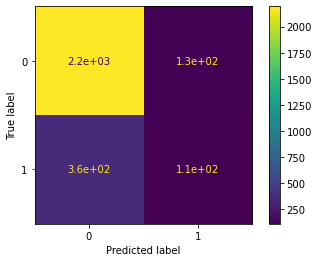

In [195]:
# Create a confusion matrix to visualize the results of the classification model
plt.figure(figsize=(15,12))
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, log_y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=[0,1])

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [196]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, log_y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2321
    Predicted would leave       0.47      0.24      0.31       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



In [197]:
# Scale data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,stratify=y,random_state=0)
log_model = LogisticRegression(random_state=42,max_iter=200000).fit(X_train,y_train)
log_y_pred = log_model.predict(X_test)
log_f1score = f1_score(y_test,log_y_pred)
log_precision= precision_score(y_test,log_y_pred)
log_accuracy = accuracy_score(y_test,log_y_pred)
log_recall = recall_score(y_test,log_y_pred)
log_roc = roc_auc_score(y_test,log_y_pred)
results_df = results_df.append({'Model': 'Logistic Regression Scaled', 'Precision': log_precision, 'Recall': log_recall,'Accuracy': log_accuracy, 'F1': log_f1score, 'Auc': log_roc}, ignore_index=True)
results_df


,Model,Precision,Recall,F1,Accuracy,Auc
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475
1,Logistic Regression Scaled,0.472340,0.235669,0.314448,0.826648,0.591122


<Figure size 1080x864 with 0 Axes>

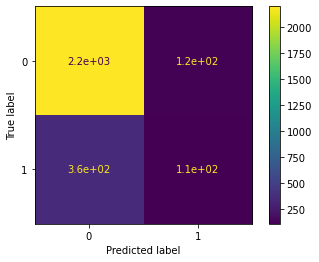

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      2321
    Predicted would leave       0.47      0.24      0.31       471

                 accuracy                           0.83      2792
                macro avg       0.67      0.59      0.61      2792
             weighted avg       0.79      0.83      0.80      2792



In [198]:
# Create a confusion matrix to visualize the results of the classification model
plt.figure(figsize=(15,12))
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, log_y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=[0,1])

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

print(classification_report(y_test, log_y_pred, target_names=target_names))

In [199]:
#As we saw, Logistic Regression didn't give us good results, so we are going to try Decision Tree, Random Forest and XGBoost models.

# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2,4, 6, 8, None],
             'min_samples_leaf': [1,2,3,4,5],
             'min_samples_split': [2, 4, 6, 8, 10]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_ = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='f1')

In [200]:
%%time
tree_.fit(X_train, y_train)

CPU times: user 10.1 s, sys: 0 ns, total: 10.1 s
Wall time: 10.1 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
       

In [201]:
print(tree_.best_params_)

print(tree_.best_score_)


{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.9480271205874569


In [202]:
def make_results(model_name:str, model_object, metric:str):

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'Auc': [auc]
                        })
  
    return table

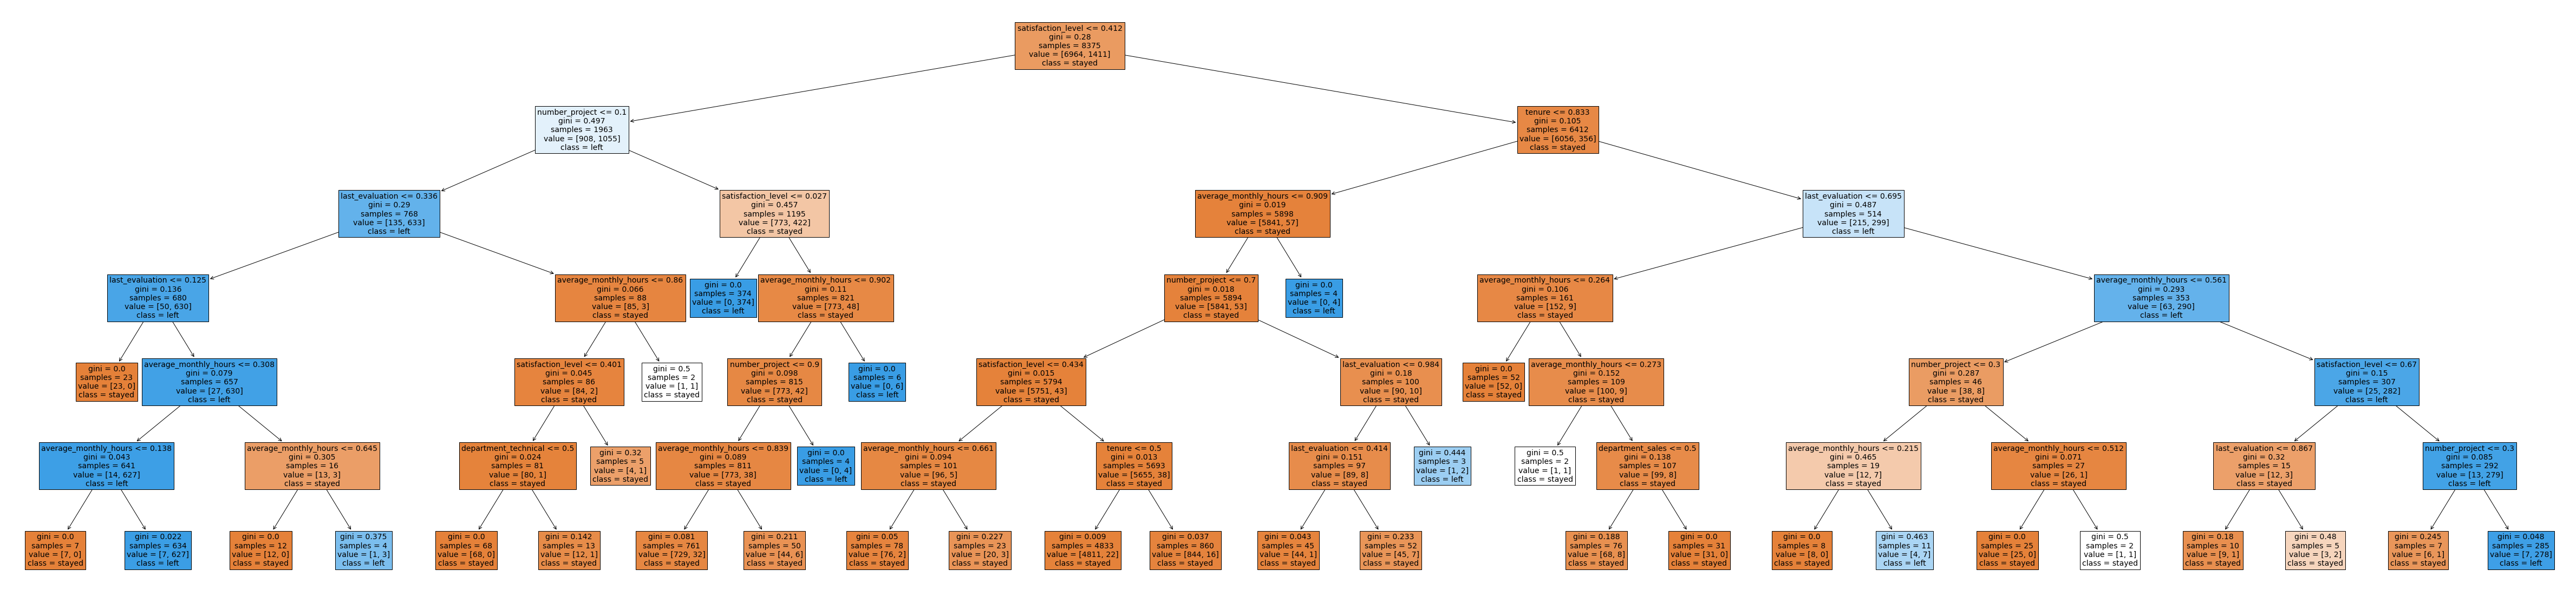

In [208]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree_.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

<Figure size 1080x864 with 0 Axes>

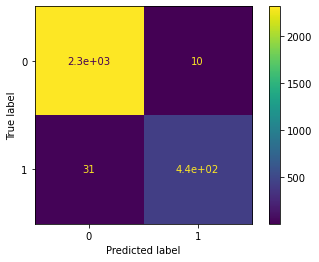

In [209]:
# Predict values

preds = tree_.best_estimator_.predict(X_test)

# Create a confusion matrix to visualize the results of the classification model
plt.figure(figsize=(15,12))
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, preds)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=[0,1])

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [203]:
tree__cv_results = make_results('Decision tree', tree_, 'f1')
results_df = pd.concat([results_df, tree__cv_results], axis=0,ignore_index=True)
results_df

,Model,Precision,Recall,F1,Accuracy,Auc
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475
1,Logistic Regression Scaled,0.472340,0.235669,0.314448,0.826648,0.591122
2,Decision tree,0.978947,0.919207,0.948027,0.983045,0.970416


In [204]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [1,3,5,7,9, None], 
             'max_features': [1.0],
             'max_samples': [0.2,0.5,0.7, 1.0],
             'min_samples_leaf': [1,2,3,4,5],
             'min_samples_split': [2,3,4,5,6],
             'n_estimators': [100,300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [205]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 2h 43min 34s, sys: 20.9 s, total: 2h 43min 55s
Wall time: 2h 43min 56s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [206]:
print(rf1.best_params_)

print(rf1.best_score_)

{'max_depth': 7, 'max_features': 1.0, 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
0.9517840028253616


<Figure size 1080x864 with 0 Axes>

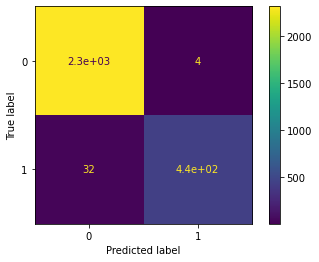

In [210]:
preds = rf1.best_estimator_.predict(X_test)

# Create a confusion matrix to visualize the results of the classification model
plt.figure(figsize=(15,12))
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, preds)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=[0,1])

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [207]:
rf1_cv_results = make_results('Random Forest', rf1, 'f1')
results_df = pd.concat([results_df, rf1_cv_results], axis=0,ignore_index=True)
results_df

,Model,Precision,Recall,F1,Accuracy,Auc
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475
1,Logistic Regression Scaled,0.472340,0.235669,0.314448,0.826648,0.591122
2,Decision tree,0.978947,0.919207,0.948027,0.983045,0.970416
3,Random Forest,0.988581,0.917786,0.951784,0.984358,0.979922


In [219]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'max_depth': [2, 4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1','roc_auc'}
xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [220]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 42.2 s, sys: 272 ms, total: 42.5 s
Wall time: 21.8 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3],


In [221]:
print(xgb_cv.best_params_)

print(xgb_cv.best_score_)

{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 10, 'subsample': 0.7}
0.9420495022183915


<Figure size 1080x864 with 0 Axes>

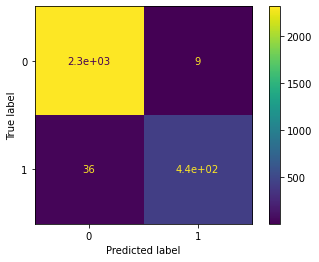

In [222]:
preds = xgb_cv.best_estimator_.predict(X_test)

# Create a confusion matrix to visualize the results of the classification model
plt.figure(figsize=(15,12))
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, preds)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=[0,1])

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [223]:
xgb_cv_results = make_results('XGBoost', xgb_cv, 'f1')
results_df = pd.concat([results_df, xgb_cv_results], axis=0,ignore_index=True)
results_df

,Model,Precision,Recall,F1,Accuracy,Auc
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475
1,Logistic Regression Scaled,0.472340,0.235669,0.314448,0.826648,0.591122
2,Decision tree,0.978947,0.919207,0.948027,0.983045,0.970416
3,Random Forest,0.988581,0.917786,0.951784,0.984358,0.979922
4,XGBoost,0.975781,0.910703,0.942050,0.981134,0.981435


In [227]:
results_df.sort_values(by='F1',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Auc
3,Random Forest,0.988581,0.917786,0.951784,0.984358,0.979922
2,Decision tree,0.978947,0.919207,0.948027,0.983045,0.970416
4,XGBoost,0.975781,0.910703,0.942050,0.981134,0.981435
1,Logistic Regression Scaled,0.472340,0.235669,0.314448,0.826648,0.591122
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475


In [229]:
rf1_importances = pd.DataFrame(rf1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf1_importances = rf1_importances.sort_values(by='gini_importance', ascending=False)

rf1_importances

,gini_importance
satisfaction_level,0.505264
number_project,0.158950
tenure,0.143673
last_evaluation,0.118495
average_monthly_hours,0.065832
salary,0.001412
department_management,0.001116
department_RandD,0.000961
department_sales,0.000901
department_technical,0.000836


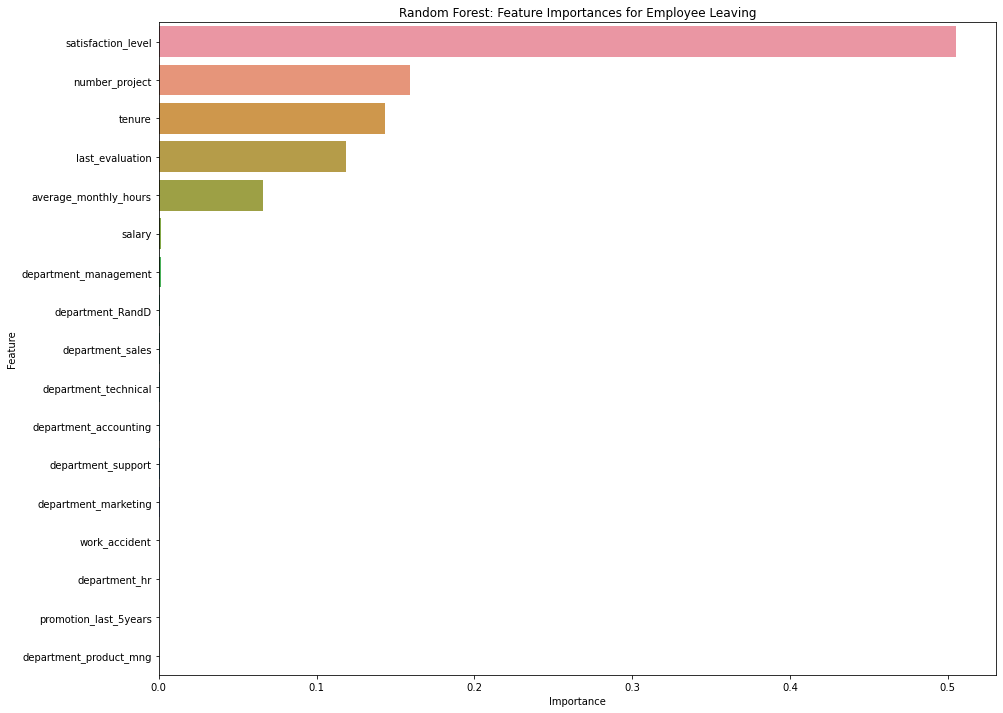

In [231]:
plt.figure(figsize=(15,12))
sns.barplot(data=rf1_importances, x="gini_importance", y=rf1_importances.index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)? Random Forest is the best model for predicting 'left' values, followed by Decision Tree and XGBoost. Logistic regression didn't yield good results, even with the data scaled using MinMaxScaler.
- What business recommendations do you propose based on the models built? Increase the satisfaction level of the employees.
- What potential recommendations would you make to your manager/company? Reduce the number of projects in which every employee is envolved, this will reduce the monthly hours worked so the satisfaction level will increase.
- Do you think your model could be improved? Why or why not? How? Model is almost perfect, there is no need of improving it. 
- Given what you know about the data and the models you were using, what other questions could you address for the team?  How this data was collected? Is a clear and fair representation of all the employees?     

Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [228]:
### Summary of model results

results_df.sort_values(by='F1',ascending=False)

,Model,Precision,Recall,F1,Accuracy,Auc
3,Random Forest,0.988581,0.917786,0.951784,0.984358,0.979922
2,Decision tree,0.978947,0.919207,0.948027,0.983045,0.970416
4,XGBoost,0.975781,0.910703,0.942050,0.981134,0.981435
1,Logistic Regression Scaled,0.472340,0.235669,0.314448,0.826648,0.591122
0,Logistic Regression,0.466387,0.235669,0.313117,0.825573,0.590475


### Conclusion, Recommendations, Next Steps

Our analysis indicates that the Random Forest model outperforms Decision Tree and XGBoost in predicting employee attrition ('left' values), while logistic regression yielded unsatisfactory results despite data scaling. We recommend a strategic focus on increasing employee satisfaction to reduce attrition rates. It is also advisable to consider reducing the number of projects assigned to each employee to manage working hours and improve job satisfaction. Although our models are performing well, there is room for continuous improvement through refined data collection and feature engineering. Looking ahead, it's important to investigate data collection methods and ensure that they provide a clear and unbiased representation of all employees, while further exploring the specific factors that influence employee satisfaction and attrition for data-informed decision-making.